# Bitacora para el manejo de secuencias ensambladas y búsqueda con *Blastx*

## Para el siguiente ejercicio es necesario tener el Blast+ instalado en la computadora
https://www.ncbi.nlm.nih.gov/guide/data-software/

## Se utilizarán los contigs formados por el ensamblaje que se localizan en 
`~/Desktop/data/ejercicio_ensamblaje/8_S356_contigs.fa`

In [56]:
from pandas import Series, DataFrame
import pandas as pd
from Bio import SeqIO, AlignIO, SeqRecord
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
import matplotlib.pyplot as plt 
import os

In [59]:
os.makedirs('img',exist_ok=True)

In [3]:
ls ~/Desktop/data/ejercicio_ensamblaje/

8_S356_contigs.fa  8_S356_contigs.tab  8_S356_contigs_blastn.csv  trinity/


In [4]:
cd ~/Desktop/data/ejercicio_ensamblaje/

/home/user1/Desktop/data/ejercicio_ensamblaje


In [5]:
!grep ">" 8_S356_contigs.fa |wc -l

321


# Se analizarán con blastx los contigs obtenidos a la base de datos *Swissprot*

In [6]:
%%bash
export BLASTDB=/home/user1/DATA/swiss/

date  
time blastx -query 8_S356_contigs.fa  -db /home/user1/DATA/swiss/swissprot \
-out 8_S356_contigs_blastx.tab -evalue 1E-6 -max_target_seqs 1 \
-num_threads 2 -outfmt "6 std stitle" 
date

Thu Aug  2 17:16:43 UTC 2018
Thu Aug  2 17:20:51 UTC 2018



real	4m7.935s
user	8m0.967s
sys	0m1.220s


In [7]:
!date

Thu Aug  2 17:20:51 UTC 2018


In [8]:
!head 8_S356_contigs_blastx.tab

8_S356_contig000023	O00370.1	27.848	158	109	3	96	557	615	771	3.21e-12	68.2	RecName: Full=LINE-1 retrotransposable element ORF2 protein; Short=ORF2p; Includes: RecName: Full=Reverse transcriptase; Includes: RecName: Full=Endonuclease
8_S356_contig000027	P03934.1	41.860	86	50	0	102	359	45	130	1.62e-13	67.8	RecName: Full=Transposable element Tc1 transposase
8_S356_contig000064	P16423.1	22.650	468	335	13	246	1625	310	758	4.23e-18	92.4	RecName: Full=Retrovirus-related Pol polyprotein from type-2 retrotransposable element R2DM; AltName: Full=Retrovirus-related Pol polyprotein from type II retrotransposable element R2DM; Includes: RecName: Full=Protease; Includes: RecName: Full=Reverse transcriptase; Includes: RecName: Full=Endonuclease
8_S356_contig000067	Q04202.1	32.258	217	135	5	634	5	49	260	2.35e-20	92.0	RecName: Full=Transposable element Tcb2 transposase
8_S356_contig000071	Q95SX7.1	25.622	402	282	8	1422	256	441	838	1.52e-20	99.0	RecName: Full=Probable RNA-directed DNA polymerase from tr

In [22]:
encabezado =("qseqid", "sseqid", "pident", "length", "mismatch", "gapopen","qstart", 
             "qend", "sstart","send", "evalue", "bitscore", "stitle")

In [23]:
ftab=pd.read_table("8_S356_contigs_blastx.tab", header=None , names= encabezado)
ftab.head()

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,stitle
0,8_S356_contig000023,O00370.1,27.848,158,109,3,96,557,615,771,3.210000e-12,68.2,RecName: Full=LINE-1 retrotransposable element...
1,8_S356_contig000027,P03934.1,41.860,86,50,0,102,359,45,130,1.620000e-13,67.8,RecName: Full=Transposable element Tc1 transpo...
2,8_S356_contig000064,P16423.1,22.650,468,335,13,246,1625,310,758,4.230000e-18,92.4,RecName: Full=Retrovirus-related Pol polyprote...
3,8_S356_contig000067,Q04202.1,32.258,217,135,5,634,5,49,260,2.350000e-20,92.0,RecName: Full=Transposable element Tcb2 transp...
4,8_S356_contig000071,Q95SX7.1,25.622,402,282,8,1422,256,441,838,1.520000e-20,99.0,RecName: Full=Probable RNA-directed DNA polyme...


In [33]:
ftab["uniprotid"]=ftab["sseqid"].astype(str).str[:6]
ftab.head(2)

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,stitle,uniprotid
0,8_S356_contig000023,O00370.1,27.848,158,109,3,96,557,615,771,3.210000e-12,68.2,RecName: Full=LINE-1 retrotransposable element...,O00370
1,8_S356_contig000027,P03934.1,41.860,86,50,0,102,359,45,130,1.620000e-13,67.8,RecName: Full=Transposable element Tc1 transpo...,P03934


In [26]:
!date

Thu Aug  2 17:50:58 UTC 2018


In [27]:
fspid = pd.read_csv('/home/user1/DATA/spidgo.csv')
fspid.head(2)

,uniprotid,GO_id
0,A0A000,GO:0003824
1,A0A000,GO:0003824


In [28]:
!date

Thu Aug  2 17:52:01 UTC 2018


In [34]:
f2=pd.merge(ftab,fspid, on ="uniprotid" , how='inner')
f2.head(2)

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,stitle,uniprotid,GO_id
0,8_S356_contig000023,O00370.1,27.848,158,109,3,96,557,615,771,3.210000e-12,68.2,RecName: Full=LINE-1 retrotransposable element...,O00370,GO:0003723
1,8_S356_contig000023,O00370.1,27.848,158,109,3,96,557,615,771,3.210000e-12,68.2,RecName: Full=LINE-1 retrotransposable element...,O00370,GO:0003964


In [36]:
fspid = ''
fspid

''

In [37]:
!date

Thu Aug  2 18:03:23 UTC 2018


In [38]:
fgo = pd.read_csv('~/Desktop/bigdata/go_to_goslim.csv')
fgo.head(2)

,GO_id,term,GOSlim_bin,aspect,clean
0,GO:0000001,mitochondrion inheritance,cell organization and biogenesis,P,1
1,GO:0000002,mitochondrial genome maintenance,cell organization and biogenesis,P,1


In [39]:
!date

Thu Aug  2 18:03:24 UTC 2018


In [40]:
f3=pd.merge(f2,fgo, on ="GO_id" , how='inner')
f3.head()

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,stitle,uniprotid,GO_id,term,GOSlim_bin,aspect,clean
0,8_S356_contig000023,O00370.1,27.848,158,109,3,96,557,615,771,3.210000e-12,68.2,RecName: Full=LINE-1 retrotransposable element...,O00370,GO:0003723,RNA binding,nucleic acid binding activity,F,1
1,8_S356_contig000099,O00370.1,29.469,207,142,2,139,759,6,208,4.140000e-21,95.5,RecName: Full=LINE-1 retrotransposable element...,O00370,GO:0003723,RNA binding,nucleic acid binding activity,F,1
2,8_S356_contig000064,P16423.1,22.650,468,335,13,246,1625,310,758,4.230000e-18,92.4,RecName: Full=Retrovirus-related Pol polyprote...,P16423,GO:0003723,RNA binding,nucleic acid binding activity,F,1
3,8_S356_contig000071,Q95SX7.1,25.622,402,282,8,1422,256,441,838,1.520000e-20,99.0,RecName: Full=Probable RNA-directed DNA polyme...,Q95SX7,GO:0003723,RNA binding,nucleic acid binding activity,F,1
4,8_S356_contig000084,Q95SX7.1,26.415,159,108,2,109,558,616,774,3.470000e-11,66.2,RecName: Full=Probable RNA-directed DNA polyme...,Q95SX7,GO:0003723,RNA binding,nucleic acid binding activity,F,1


In [41]:
f4=f3.drop_duplicates(subset = ('qseqid', "aspect"), inplace = False)
f4.describe()[['length','evalue']]

,length,evalue
count,63.000000,6.300000e+01
mean,161.365079,1.456939e-08
std,117.224943,5.503168e-08
min,23.000000,2.320000e-50
25%,70.000000,1.780000e-22
50%,146.000000,6.140000e-20
75%,223.000000,2.225000e-11
max,468.000000,3.080000e-07


In [42]:
f4.to_csv("8_S356_contigs_blastx_goslim.csv", index =  None)

In [43]:
ftabpivot = f4.pivot_table(values="uniprotid" , index=["qseqid"], aggfunc=len, columns="aspect")
ftabpivot.describe()

aspect,C,F,P
count,18.0,22.0,23.0
mean,1.0,1.0,1.0
std,0.0,0.0,0.0
min,1.0,1.0,1.0
25%,1.0,1.0,1.0
50%,1.0,1.0,1.0
75%,1.0,1.0,1.0
max,1.0,1.0,1.0


# Proceso para generar el diagama de Venn con la información de 
## Componentes celulares, funciones biologicas y procesos biologicos, C, F y P, respectivamente

In [44]:
lineaC =[] # data from C
lineaF =[] # data from F
lineaP =[] # data from P
linea = ""
n=1
for row in ftabpivot.index:
    row2=ftabpivot.loc[row]
    if str(row2["C"])=="nan" and str(row2["F"])=="nan" and str(row2["P"])=="nan" :
        continue    
    else:        
        if str(row2["C"]) !="nan":
            linea = row
        else:
            linea = ""
        lineaC.append(linea)
        if str(row2["F"]) !="nan":
            linea = row
        else:
            linea = ""
        lineaF.append(linea)

        if str(row2["P"]) !="nan":
            linea = row
        else:
            linea = ""
        lineaP.append(linea)

        n+=1
        #if n==1000:
        #    break

len(lineaC), len(lineaF), len(lineaP)

(23, 23, 23)

In [45]:
from matplotlib_venn import venn3_unweighted

ImportError: /home/jupyter/miniconda3/bin/../lib/libm.so.6: symbol __get_cpu_features version GLIBC_PRIVATE not defined in file libc.so.6 with link time reference

save figure? y


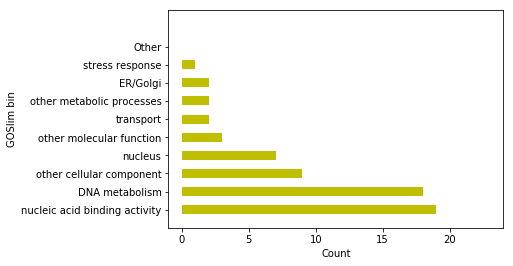

In [61]:
fgo=f4.groupby('GOSlim_bin')["qseqid"].count()
#fgo

fgo.sort_values(inplace = True, ascending=False)
#fgo

linea10=fgo[0:10]
linea11=fgo[10:]
#linea10

#linea11
otro=sum (linea11)
#otro
otros = pd.DataFrame({0:otro}, index=["Other"])
#otros
linea10=linea10.append(otros)
#linea10
linea10.plot(kind='barh', color=list('ybg'))
plt.axis([-1, max(linea10[0]+5), -1, 11], label=None)
plt.xlabel("Count")
plt.ylabel("GOSlim bin")
plt.legend().set_visible(False)
yes="n"
yes = input("save figure? ")
if yes=="y":
    plt.savefig("img/8_S356_contigs_blastx_GObar.png", dpi=400, bbox_inches='tight')

plt.show()

In [ ]:
n=0
for rec in ftab["stitle"]:
    print (rec)
    n+=1
    if n==20:
        break